In [1]:
# # BASICS
# from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# # HELPER FUNCTIONS
# # import src.my_resample as ms
import src.my_functions as mf

# # METRICS
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score 
# from sklearn.metrics import recall_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# GRID SEARCHING
from sklearn.model_selection import RandomizedSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
X_train, X_test, y_train, y_test, cols = mf.load_arrays(scale = True, classification = True)

# RandomForestClassifier

In [3]:
# Grid
random_forest_grid={
    "n_estimators": [5, 7, 11],
    "max_features": [.6, .7, .8, .9], 
    "max_depth": np.arange(11, 17, 1),
    "min_samples_split": np.arange(2, 20),
    "min_samples_leaf": (1, 5),
    "max_leaf_nodes": np.arange(200, 600, 10),
    "min_impurity_decrease": np.arange(0, .0001, .00001),
    "class_weight": [{0:n, 1:1-n} for n in np.arange(.1, 1, .1)]
}

In [4]:
%%time

# Grid Search
rfc = RandomForestClassifier()
rf_model = RandomizedSearchCV(rfc, param_distributions=random_forest_grid, scoring='f1', n_iter=100)
rf_model.fit(X_train, y_train)

CPU times: user 2min 4s, sys: 1.5 s, total: 2min 6s
Wall time: 2min 14s


In [5]:
# Predict
y_pred_rf = rf_model.predict(X_test)
y_pp_rf = rf_model.predict_proba(X_test)

mf.display_metrics(y_pred_rf, y_test)


METRICS
Model recall: 0.350
Model precision: 0.346
Model f1: 0.348
Model accuracy: 0.867

CONFUSION MATRIX        key
2127	172		TP	FP
169	91		FN	TP


In [64]:
# format parameters to pass to function
d = rf_model.best_params_
for key, value in d.items():
#     print(param)
    print("{}={}, ".format(key, value), end = '')
#     print(key)

n_estimators=7, min_samples_split=18, min_samples_leaf=1, min_impurity_decrease=8e-05, max_leaf_nodes=230, max_features=0.8, max_depth=13, class_weight={0: 0.10000000000000001, 1: 0.90000000000000002}, 

In [85]:
# create new model to get feature importances
new_rf_model = RandomForestClassifier(n_estimators=7, min_samples_split=18, min_samples_leaf=1, min_impurity_decrease=8e-05, max_leaf_nodes=230, max_features=0.8, max_depth=13, class_weight={0: 0.10000000000000001, 1: 0.90000000000000002})
new_rf_model.fit(X_train, y_train)
rf_features = new_rf_model.feature_importances_
rf_features.sum()

1.0

# Gradient Boosting Classifier

In [6]:
# Grid
gradient_boost_grid={'learning_rate': [ 0.4,  0.5,  0.6,  0.7,  0.8],
                         'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': range(1, 15),
                         'n_estimators': [300]}

In [7]:
%%time

# Grid Search
gbc = GradientBoostingClassifier()
gb_model = RandomizedSearchCV(gbc, param_distributions=gradient_boost_grid, scoring='f1')
gb_model.fit(X_train, y_train)

CPU times: user 3min 9s, sys: 949 ms, total: 3min 10s
Wall time: 3min 12s


In [8]:
# Predict
y_pred_gb = gb_model.predict(X_test)
y_pp_gb = gb_model.predict_proba(X_test)

mf.display_metrics(y_pred_gb, y_test)


METRICS
Model recall: 0.281
Model precision: 0.277
Model f1: 0.279
Model accuracy: 0.852

CONFUSION MATRIX        key
2108	191		TP	FP
187	73		FN	TP


In [65]:
# format parameters to pass to function
d = gb_model.best_params_
for key, value in d.items():
#     print(param)
    print("{}={}, ".format(key, value), end = '')
#     print(key)

n_estimators=300, min_samples_leaf=1, max_depth=30, learning_rate=0.7, 

In [84]:
# create new model to get feature importances
new_gb_model = GradientBoostingClassifier(n_estimators=300, min_samples_leaf=1, max_depth=30, learning_rate=0.7)
new_gb_model.fit(X_train, y_train)
gb_features = new_gb_model.feature_importances_
gb_features.sum()

0.040000000000000001

# Ada Boost Classifier

In [9]:
# Grid
ada_boost_grid = {
    "n_estimators": range(1, 150, 10),          #  50
    "learning_rate": np.arange(.1, 2, .2),      #  1
}


In [10]:
%%time

# Grid Search
abc = AdaBoostClassifier()
ab_model = RandomizedSearchCV(abc, param_distributions=ada_boost_grid, scoring='f1', n_jobs=-1)
ab_model.fit(X_train, y_train)

CPU times: user 1.66 s, sys: 195 ms, total: 1.86 s
Wall time: 19.6 s


In [11]:
# Predict
y_pred_ab = ab_model.predict(X_test)
y_pp_ab = ab_model.predict_proba(X_test)

mf.display_metrics(y_pred_ab, y_test)


METRICS
Model recall: 0.135
Model precision: 0.432
Model f1: 0.205
Model accuracy: 0.894

CONFUSION MATRIX        key
2253	46		TP	FP
225	35		FN	TP


In [67]:
# format parameters to pass to function
d = ab_model.best_params_
for key, value in d.items():
#     print(param)
    print("{}={}, ".format(key, value), end = '')
#     print(key)

n_estimators=51, learning_rate=1.5000000000000004, 

In [68]:
# create new model to get feature importances
new_ab_model = AdaBoostClassifier(n_estimators=51, learning_rate=1.5)
new_ab_model.fit(X_train, y_train)
ab_features = new_ab_model.feature_importances_

In [83]:
ab_features.sum()

1.0

# LOGISTIC REGRESSION

In [12]:
lin_mod = LogisticRegression()
lin_mod.fit(X_train, y_train)
y_pred_lr = lin_mod.predict(X_test)
y_pp_lr = lin_mod.predict_proba(X_test)

In [13]:
mf.display_metrics(y_pred_lr, y_test)


METRICS
Model recall: 0.050
Model precision: 0.565
Model f1: 0.092
Model accuracy: 0.900

CONFUSION MATRIX        key
2289	10		TP	FP
247	13		FN	TP


# NEURAL NETS

In [14]:
nn_model = LogisticRegression()
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
y_pp_nn = nn_model.predict_proba(X_test)

In [15]:
mf.display_metrics(y_pred_nn, y_test)


METRICS
Model recall: 0.050
Model precision: 0.565
Model f1: 0.092
Model accuracy: 0.900

CONFUSION MATRIX        key
2289	10		TP	FP
247	13		FN	TP


# K NEAREST NEIGHBORS

In [16]:
nn_model = KNeighborsClassifier()
nn_model.fit(X_train, y_train)
y_pred_knn = nn_model.predict(X_test)
y_pp_knn = nn_model.predict_proba(X_test)

In [17]:
mf.display_metrics(y_pred_knn, y_test)


METRICS
Model recall: 0.092
Model precision: 0.471
Model f1: 0.154
Model accuracy: 0.897

CONFUSION MATRIX        key
2272	27		TP	FP
236	24		FN	TP


# COMBINE

In [18]:
models = ['rf','gb','ab','lr','nn','knn']
predictions = [y_pred_rf,y_pred_gb,y_pred_ab,y_pred_lr,y_pred_nn,y_pred_knn]
probabilities = [y_pp_rf,y_pp_gb,y_pp_ab,y_pp_lr,y_pp_nn,y_pp_knn]

results = pd.DataFrame(
    {'y_test': y_test,
     
     'rf': y_pred_rf,
     'gb': y_pred_gb,
     'ab': y_pred_ab,
     'lr': y_pred_lr,
     'nn': y_pred_nn,
     'knn': y_pred_knn, 
     
     "rf_pp": y_pp_rf[:,1],
     "gb_pp": y_pp_gb[:,1],
     "ab_pp": y_pp_ab[:,1],
     "lr_pp": y_pp_lr[:,1],
     'nn_pp': y_pp_nn[:,1],
     'knn_pp': y_pp_knn[:,1],
    })

In [19]:
results['s'] = results.ab+results.gb+results.rf+results.lr+results.nn+results.knn
results["s_pp"] = results.ab_pp+results.gb_pp+results.rf_pp+results.lr_pp+results.nn_pp+results.knn_pp
results['p'] = results['s'].apply(lambda x: 1 if x > 0 else 0)

In [24]:
results.to_pickle("data/results.pkl")

# Voting

In [20]:
y_pred = results['p']
mf.display_metrics(y_pred, y_test)


METRICS
Model recall: 0.542
Model precision: 0.284
Model f1: 0.373
Model accuracy: 0.815

CONFUSION MATRIX        key
1944	355		TP	FP
119	141		FN	TP


0.705524140931


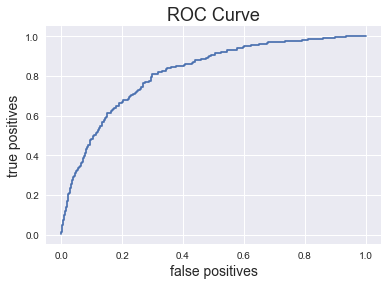

In [21]:
print(roc_auc_score(y_test, results.s))
y = roc_curve(y_test, results.s_pp)

plt.plot(y[0], y[1])
plt.xlabel("false positives", fontsize=14)
plt.ylabel("true positives", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.savefig("img/roc.png")
plt.show()

# Most Important Features

In [77]:
features = pd.DataFrame(
    {'features': cols,
     'rf': rf_features,
     'gb': gb_features,
     'ab': ab_features
    })

features['sum'] = features.rf+features.gb+features.ab

In [100]:
# sort, rearrange, and pickle
features.sort_values('sum', ascending=False).reset_index()[['features', 'rf', 'gb', 'ab', 'sum']].to_pickle('data/features.pkl')

# More Stuff 'n' Ideas

In [22]:
f1 = []
precision = []
recall = []
for cutoff in np.arange(0, 4.1, .01):
    y_pred = results['s'].apply(lambda x: 1 if x > cutoff else 0)
    f1.append(f1_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
        
print(max(f1))
plt.plot(np.arange(0, 4.1, .01), f1)
plt.show()

NameError: name 'f1_score' is not defined

In [ ]:
recalls = []
precisions = []
accuracies = []
fones = []

y_pp = results['s']
x = np.arange(0, 4, .1)
for cutoff in x:
    y_pred = y_pp.apply(lambda x: 1 if x > cutoff else 0)
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_pred, y_test))
    fones.append(f1_score(y_test, y_pred))


In [ ]:
plt.plot(x, recalls)
plt.plot(x, precisions)
plt.plot(x, accuracies)
plt.plot(x, fones)
plt.legend(['recall', 'precision', 'accuracy', 'fone'])
plt.show()

# Adding Probabilities

In [ ]:
print(roc_auc_score(y_test, results.s_pp))
y = roc_curve(y_test, results.s_pp)

plt.plot(y[0], y[1])
plt.xlabel("false positives", fontsize=14)
plt.ylabel("true positives", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.savefig(readme_file_path+"roc.png")
plt.show()

In [ ]:
print(roc_auc_score(y_test, results.s_pp))
y = roc_curve(y_test, results.s_pp)

plt.plot(y[0], y[1])
plt.xlabel("false positives", fontsize=14)
plt.ylabel("true positives", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.savefig(readme_file_path+"roc.png")
plt.show()

In [ ]:
f1 = []
precision = []
recall = []
for cutoff in np.arange(0, 4.1, .01):
    results['p_pp'] = results['s_pp'].apply(lambda x: 1 if x > cutoff else 0)
    f1.append(f1_score(y_test, results['p_pp']))
    precision.append(precision_score(y_test, results['p_pp']))
    recall.append(recall_score(y_test, results['p_pp']))
        
print(max(f1))
plt.plot(np.arange(0, 4.1, .01), f1)
plt.show()

In [ ]:
f1 = []
precision = []
recall = []
for cutoff in np.arange(0, 3.1, .01):
    results['p_pp'] = results['s_pp'].apply(lambda x: 1 if x > cutoff else 0)
    f1.append(f1_score(y_test, results['p_pp']))
    precision.append(precision_score(y_test, results['p_pp']))
    recall.append(recall_score(y_test, results['p_pp']))
    
print(max(f1))
plt.plot(np.arange(0, 3.1, .01), f1)
plt.show()

In [ ]:
plt.scatter(recall, precision, marker='.')
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [ ]:
recalls = []
precisions = []
accuracies = []
fones = []

y_pp = results['s_pp']
x = np.arange(0, 4, .1)
for cutoff in x:
    y_pred = y_pp.apply(lambda x: 1 if x > cutoff else 0)
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_pred, y_test))
    fones.append(f1_score(y_test, y_pred))


# print("\nMETRICS")
# print("Model recall: {}".format(recall_score(y_test, y_pred)))
# print("Model precision: {}".format(precision_score(y_test, y_pred)))
# print("Model accuracy: {}".format(accuracy_score(y_pred, y_test)))
# print("Model f1: {}".format(f1_score(y_test, y_pred)))

# print ("\nCONFUSION MATRIX")
# print (confusion_matrix(y_test, y_pred))
# print ("\nkey:")
# print (" TN   FP ")
# print (" FN   TP ")

In [ ]:
plt.plot(x, recalls)
plt.plot(x, precisions)
plt.plot(x, accuracies)
plt.plot(x, fones)
plt.legend(['recall', 'precision', 'accuracy', 'fone'])
plt.show()

recalls

In [ ]:
cutoff = x[fones.index(max(fones))]

y_pred = y_ pp.apply(lambda x: 1 if x > cutoff else 0)

print("\nMETRICS")
print("Model recall: {}".format(recall_score(y_test, y_pred)))
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model accuracy: {}".format(accuracy_score(y_pred, y_test)))
print("Model f1: {}".format(f1_score(y_test, y_pred)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")